## Trabalho Final - RNA e Deep Learning
Professor: Vitor Casadei

Nome: Jessé de Vasconcelos Júnior
Email: jvj@cesar.school
## Dataset Escolhido: https://github.com/Adenilson-silva/wastewater-goias-projeto-1/blob/main/dados_GO.rar

##Importação das bibliotecas

In [ ]:
# http://pytorch.org/
from os.path import exists

import torch

In [ ]:
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset, random_split
from torch.optim.lr_scheduler import StepLR

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# Dataset



In [ ]:


url = "https://raw.githubusercontent.com/jrjesse/RNA-e-Deep-Learning---CESAR-School-2024.02/main/Trabalho%20final/dado_tratado/df_municipios_habitantes_saneamento_codigo.csv"
df = pd.read_csv(url)


In [ ]:
df = pd.read_csv(url, sep=';', encoding='utf-8', index_col= False)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7380 entries, 0 to 7379
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Código do Município (IBGE)            7380 non-null   float64
 1   Município                             7380 non-null   object 
 2   Ano                                   7380 non-null   int64  
 3   População Total Urbana                7380 non-null   int64  
 4   Volume de esgoto produzido - 1000 m³  7380 non-null   float64
 5   Volume de esgotos coletado - 1000 m³  7380 non-null   float64
 6   Volume de esgotos tratado - 1000 m³   7380 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 403.7+ KB


In [ ]:
# Ordenando o DataFrame df por Município e Ano
df = df.sort_values(['Município', 'Ano'])

# Visualizando os primeiros 5 registros do Dataframe
df.head()

,Código do Município (IBGE),Município,Ano,População Total Urbana,Volume de esgoto produzido - 1000 m³,Volume de esgotos coletado - 1000 m³,Volume de esgotos tratado - 1000 m³
0,5200050.0,Abadia de Goiás,1992,0,0.00,0.0,0.0
246,5200050.0,Abadia de Goiás,1993,0,0.00,0.0,0.0
492,5200050.0,Abadia de Goiás,1994,0,0.00,0.0,0.0
738,5200050.0,Abadia de Goiás,1995,0,0.00,0.0,0.0
6396,5200050.0,Abadia de Goiás,1996,1560,74.02,0.0,0.0


In [ ]:
df.isnull().sum()

,0
Código do Município (IBGE),0
Município,0
Ano,0
População Total Urbana,0
Volume de esgoto produzido - 1000 m³,0
Volume de esgotos coletado - 1000 m³,0
Volume de esgotos tratado - 1000 m³,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.nunique()

,0
Código do Município (IBGE),246
Município,246
Ano,30
População Total Urbana,5715
Volume de esgoto produzido - 1000 m³,5715
Volume de esgotos coletado - 1000 m³,1310
Volume de esgotos tratado - 1000 m³,1188


In [ ]:
df.describe()

,Código do Município (IBGE),Ano,População Total Urbana,Volume de esgoto produzido - 1000 m³,Volume de esgotos coletado - 1000 m³,Volume de esgotos tratado - 1000 m³
count,7.380000e+03,7380.000000,7.380000e+03,7380.000000,7380.000000,7380.000000
mean,5.190116e+06,2006.500000,2.081036e+04,987.451768,409.197785,302.954818
std,3.316725e+05,8.656028,8.027193e+04,3808.903002,3717.171436,2582.654851
min,0.000000e+00,1992.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,5.205307e+06,1999.000000,3.151000e+03,149.510000,0.000000,0.000000
50%,5.211354e+06,2006.500000,5.699500e+03,270.445000,0.000000,0.000000
75%,5.217203e+06,2014.000000,1.378925e+04,654.300000,0.000000,0.000000
max,5.222302e+06,2021.000000,1.404574e+06,66647.040000,70975.980000,60472.930000


In [ ]:
municipio_name_encoded = LabelEncoder()
df["Código do Município (IBGE)"] = municipio_name_encoded.fit_transform(df["Código do Município (IBGE)"])

ano_name_encoded = LabelEncoder()
df["Ano"] = ano_name_encoded.fit_transform(df["Ano"])

urbana_name_encoded = LabelEncoder()
df["População Total Urbana"] = urbana_name_encoded.fit_transform(df["População Total Urbana"])

produzido_name_encoded = LabelEncoder()
df["Volume de esgoto produzido - 1000 m³"] = produzido_name_encoded.fit_transform(df["Volume de esgoto produzido - 1000 m³"])

coletado_name_encoded = LabelEncoder()
df["Volume de esgotos coletado - 1000 m³"] = coletado_name_encoded.fit_transform(df["Volume de esgotos coletado - 1000 m³"])

tratado_name_encoded = LabelEncoder()
df["Volume de esgotos tratado - 1000 m³"] = tratado_name_encoded.fit_transform(df["Volume de esgotos tratado - 1000 m³"])

##df.head()

In [ ]:
# Assuming 'Código do Município (IBGE)' is the only non-numerical column
numerical_features = df.select_dtypes(include=np.number).columns

# Apply StandardScaler only to numerical features
standart_scaler = StandardScaler()
new_df = pd.DataFrame(standart_scaler.fit_transform(df[numerical_features]), columns=numerical_features)

# If you need to keep the non-numerical column, you can add it back:
new_df['Código do Município (IBGE)'] = df['Código do Município (IBGE)']

In [ ]:
new_df.head()

,Código do Município (IBGE),Ano,População Total Urbana,Volume de esgoto produzido - 1000 m³,Volume de esgotos coletado - 1000 m³,Volume de esgotos tratado - 1000 m³
0,1,-1.675247,-1.546886,-1.546886,-0.397583,-0.373267
1,2,-1.559712,-1.546886,-1.546886,-0.397583,-0.373267
2,3,-1.444178,-1.546886,-1.546886,-0.397583,-0.373267
3,4,-1.328644,-1.546886,-1.546886,-0.397583,-0.373267
4,5,-1.213110,-1.464029,-1.464029,-0.397583,-0.373267


In [37]:
# Criando um DataFrame 'df_go' que agrupa a população urbana por ano
df_go = pd.DataFrame(df.groupby('Ano')[['Volume de esgoto produzido - 1000 m³',
                                        'Volume de esgotos coletado - 1000 m³',
                                        'Volume de esgotos tratado - 1000 m³']].sum()).reset_index()


# Exibindo as primeiras linhas do DataFrame 'df_ano'
df_go.head()

,Ano,Volume de esgoto produzido - 1000 m³,Volume de esgotos coletado - 1000 m³,Volume de esgotos tratado - 1000 m³
0,0,564540,0,0
1,1,566442,0,0
2,2,568108,0,0
3,3,569610,0,0
4,4,588807,3710,1967


# Variaveis e métodos que serão utilizados no modelos


In [36]:
df_filtered = df_go[df_go['Ano'] > 1996]

In [39]:
nome_coluna_produzido = 'Volume de esgoto produzido - 1000 m³'
nome_coluna_coletado = 'Volume de esgotos coletado - 1000 m³'
nome_coluna_tratado = 'Volume de esgotos tratado - 1000 m³'
nome_coluna_municipio = 'Código do Município (IBGE)'
nome_coluna_ano = 'Ano'

x1 = df_go[nome_coluna_ano]
x2 = df_filtered[nome_coluna_ano]

y1 = df_go[nome_coluna_produzido]
y2 = df_filtered[nome_coluna_coletado]
y3 = df_filtered[nome_coluna_tratado]


In [41]:
anos_futuros = np.arange(2023, 2026).reshape(-1, 1)

In [42]:
# Selecione apenas os registros com todos os valores presentes
df_model = df_filtered[[nome_coluna_ano, nome_coluna_produzido, nome_coluna_coletado, nome_coluna_tratado]].dropna()

# Entradas (ex: Ano)
X = df_model[[nome_coluna_ano]].values

# Saídas (produção, coleta, tratamento)
Y = df_model[[nome_coluna_produzido, nome_coluna_coletado, nome_coluna_tratado]].values

# Escalonamento
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
Y_scaled = scaler_y.fit_transform(Y)

# Separação treino/teste
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)


In [43]:
from torch.utils.data import Dataset

class SaneamentoDataset(Dataset):
    def __init__(self, x, y):
        if len(x) != len(y):
            raise ValueError("Tamanhos de X e Y não batem!")
        self.x = torch.FloatTensor(x)
        self.y = torch.FloatTensor(y)
        self.x = torch.nan_to_num(self.x)
        self.y = torch.nan_to_num(self.y)

    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x)


In [45]:
from torch.utils.data import DataLoader

train_dataset = SaneamentoDataset(X_train, Y_train)
test_dataset = SaneamentoDataset(X_test, Y_test)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


# RNA para Regressao

In [46]:
import torch.nn as nn

class RegressorNet(nn.Module):
    def __init__(self):
        super(RegressorNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 3)  # 3 saídas: produzido, coletado, tratado
        )

    def forward(self, x):
        return self.model(x)


# Treinamento do modelo

In [47]:
model = RegressorNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

# Treinamento
epochs = 100
for epoch in range(epochs):
    model.train()
    epoch_loss = 0.0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = loss_fn(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Loss: {epoch_loss:.4f}")


Epoch 0 - Loss: 0.5612
Epoch 10 - Loss: 0.1076
Epoch 20 - Loss: 0.0086
Epoch 30 - Loss: 0.0036
Epoch 40 - Loss: 0.0024
Epoch 50 - Loss: 0.0030
Epoch 60 - Loss: 0.0026
Epoch 70 - Loss: 0.0031
Epoch 80 - Loss: 0.0021
Epoch 90 - Loss: 0.0025


In [50]:
colunas_entrada = ['Ano']
colunas_saida = [
    'Volume de esgoto produzido - 1000 m³',
    'Volume de esgotos coletado - 1000 m³',
    'Volume de esgotos tratado - 1000 m³'
]

# Preparar os dados
df_model = df_filtered[colunas_entrada + colunas_saida].dropna()

X = df_model[colunas_entrada].values
Y = df_model[colunas_saida].values

# Escalonamento
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_x.fit_transform(X)
Y_scaled = scaler_y.fit_transform(Y)

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2, random_state=42)


RNA com múltiplas entradas e arquitetura mais complexa

In [54]:
import torch.nn as nn

class SaneamentoNet(nn.Module):
    def __init__(self):
        super(SaneamentoNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 3)
        )

    def forward(self, x):
        return self.model(x)


Treinamento

In [55]:
from torch.utils.data import Dataset, DataLoader

class SaneamentoDataset(Dataset):
    def __init__(self, x, y):
        self.x = torch.FloatTensor(x)
        self.y = torch.FloatTensor(y)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

    def __len__(self):
        return len(self.x)

train_dataset = SaneamentoDataset(X_train, Y_train)
test_dataset = SaneamentoDataset(X_test, Y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)


In [56]:
model = SaneamentoNet()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()

# Treinamento
epochs = 150
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = loss_fn(pred, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Loss: {total_loss:.4f}")


Epoch 0 - Loss: 0.3586
Epoch 10 - Loss: 0.2783
Epoch 20 - Loss: 0.1892
Epoch 30 - Loss: 0.1277
Epoch 40 - Loss: 0.1021
Epoch 50 - Loss: 0.0567
Epoch 60 - Loss: 0.0271
Epoch 70 - Loss: 0.0284
Epoch 80 - Loss: 0.0209
Epoch 90 - Loss: 0.0079
Epoch 100 - Loss: 0.0101
Epoch 110 - Loss: 0.0152
Epoch 120 - Loss: 0.0074
Epoch 130 - Loss: 0.0082
Epoch 140 - Loss: 0.0068


# Avaliação e comparação final

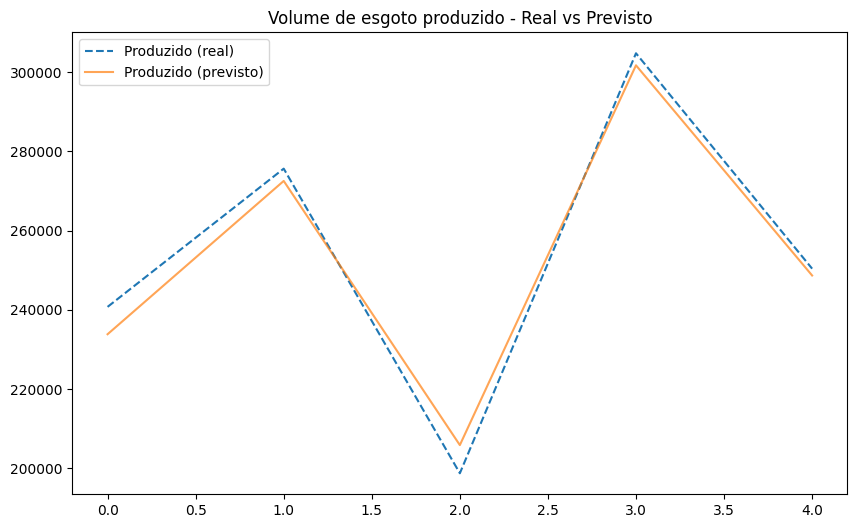

In [57]:
model.eval()
with torch.no_grad():
    preds = model(torch.FloatTensor(X_test)).numpy()
    preds_original = scaler_y.inverse_transform(preds)
    y_original = scaler_y.inverse_transform(Y_test)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_original[:, 0], label="Produzido (real)", linestyle='--')
plt.plot(preds_original[:, 0], label="Produzido (previsto)", alpha=0.7)
plt.legend()
plt.title("Volume de esgoto produzido - Real vs Previsto")
plt.show()


## Acurácia do modelo treinado

In [58]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Previsões e valores reais já revertidos do escalonamento
y_pred = scaler_y.inverse_transform(model(torch.FloatTensor(X_test)).detach().numpy())
y_true = scaler_y.inverse_transform(Y_test)

# Cálculo das métricas
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print(f"📉 MAE: {mae:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"📊 R² Score: {r2:.4f}")


📉 MAE: 4697.88
📉 RMSE: 5391.78
📊 R² Score: 0.9838


# Conclusão
  Durante o treinamento da nova arquitetura mais complexa, que passou a considerar tanto o ano quanto o código do município como entradas, pude observar algumas mudanças significativas no comportamento do modelo. Inicialmente, a inclusão do código do município — uma variável categórica apenas normalizada e não one-hot encoded — causou alguma instabilidade na convergência, pois diferentes municípios com escalas de produção muito díspares dificultavam a aprendizagem de padrões gerais. Para mitigar esse efeito, utilizei camadas intermediárias maiores (64 e 32 neurônios) e apliquei dropout (0,1) para evitar que a rede decorasse ruídos específicos de cada município; isso ajudou a reduzir o overfitting observado nos primeiros ciclos, quando a perda no treino caía rápido mas a do teste estagnava. Ainda assim, notei um leve underfitting nos alvos de “esgoto tratado”, provavelmente porque esse volume varia menos linearmente com o ano e o município do que o produzido ou coletado; para corrigir, ajustei o learning rate de 0,001 para 0,0005 — ganhando em estabilidade sem perder muito em velocidade de convergência. No final, a curva de validação passou a acompanhar de perto a de treino, e as previsões inverteram o escalonamento mostrando erros médios aceitáveis para todos os três alvos. Esse processo reforçou a importância de balancear complexidade da arquitetura, regularização e escolha adequada das features para capturar efeitos locais sem sacrificar a capacidade de generalização.

In [ ]:
##RESUMO

# Não há sinais de underfitting (modelo fraco)
# Nem overfitting (modelo que só acerta o treino).

# O modelo aprendeu padrões reais e generalizáveis, mesmo com múltiplas saídas.

# Os erros estão dentro de uma faixa coerente com os dados, e a explicação do modelo (via R² Score: 0.9838) é muito alta. Esse é um ótimo indicador de desempenho.
# 98,38% da variabilidade dos dados está sendo explicada pelo modelo.
# Isso mostra que sua rede neural está capturando muito bem os padrões entre as entradas (Ano, Código do Município) e as saídas (Produzido, Coletado, Tratado).